In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


from sklearn.model_selection import train_test_split
# for visual
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
# accuracy stuf
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.preprocessing import LabelEncoder, StandardScaler
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Des tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# SVM
from sklearn.svm import SVC
#gridsearch for 3-5 tasks
from sklearn.model_selection import GridSearchCV
# random forest
from sklearn.ensemble import RandomForestClassifier
# ada boost
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline

df = pd.read_csv('Heart Attack Data Set.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
avg_age = df["age"].astype("float").mean(axis=0)
df["age"].replace(np.nan, avg_age, inplace = True)
df["age"] = df["age"].astype("float")

In [20]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [3]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 33.3 KB


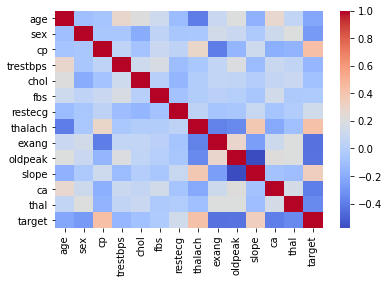

In [5]:
sns.heatmap(df.corr(),cmap='coolwarm')

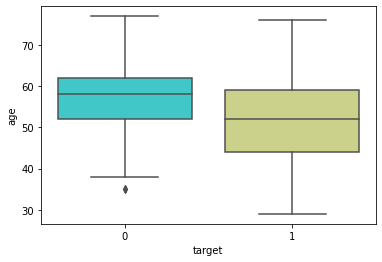

In [6]:
sns.boxplot(x='target',y='age',data=df,palette='rainbow')

In [7]:
X = df.drop(['target'], axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test)

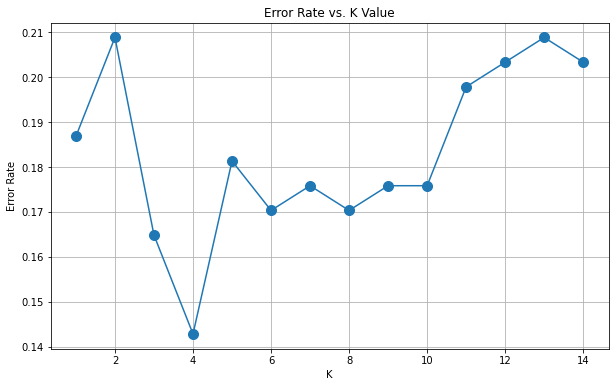

In [9]:
error_rate = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,15), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [10]:
KNN = KNeighborsClassifier(n_neighbors=4)

KNN.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[53 32]
 [ 5 92]]

              precision    recall  f1-score   support

           0       0.91      0.62      0.74        85
           1       0.74      0.95      0.83        97

    accuracy                           0.80       182
   macro avg       0.83      0.79      0.79       182
weighted avg       0.82      0.80      0.79       182



In [11]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(scaled_X_train, y_train)
y_pred = tree.predict(scaled_X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        85
           1       0.75      0.81      0.78        97

    accuracy                           0.76       182
   macro avg       0.76      0.75      0.76       182
weighted avg       0.76      0.76      0.76       182



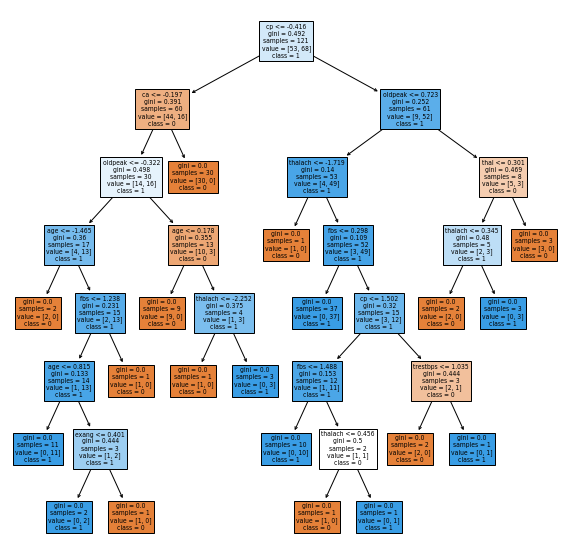

In [17]:

plt.figure(figsize = (10, 10))
plot_tree(tree, feature_names = ['age', 'sex', 'cp','chol','fbs','trestbps','restecg','thalach','exang','oldpeak','slope','ca','thal'], 
          class_names = ['0', '1'], filled = True)
plt.show()

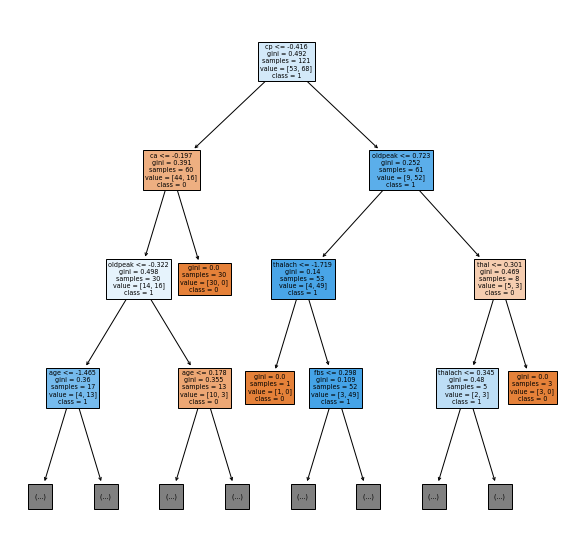

In [18]:
plt.figure(figsize = (10, 10))
plot_tree(tree, max_depth = 3, feature_names = ['age', 'sex', 'cp','chol','fbs','trestbps','restecg','thalach','exang','oldpeak','slope','ca','thal'], 
          class_names = ['0', '1'], filled = True)
plt.show()

In [19]:
SVM = SVC(C=10.0, gamma = 0.01, kernel = 'rbf')
SVM.fit(scaled_X_train,y_train)
y_pred = SVM.predict(scaled_X_test)
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[60 25]
 [ 7 90]]

              precision    recall  f1-score   support

           0       0.90      0.71      0.79        85
           1       0.78      0.93      0.85        97

    accuracy                           0.82       182
   macro avg       0.84      0.82      0.82       182
weighted avg       0.84      0.82      0.82       182



In [21]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(scaled_X_train,y_train)
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [22]:
grid_predictions = grid.predict(scaled_X_test)
print(confusion_matrix(y_test,grid_predictions))
print()
print(classification_report(y_test,grid_predictions))

[[60 25]
 [ 7 90]]

              precision    recall  f1-score   support

           0       0.90      0.71      0.79        85
           1       0.78      0.93      0.85        97

    accuracy                           0.82       182
   macro avg       0.84      0.82      0.82       182
weighted avg       0.84      0.82      0.82       182



In [23]:
RFC = RandomForestClassifier()
RFC.fit(scaled_X_train,y_train)
predictions = RFC.predict(scaled_X_test)
print(classification_report(y_test,predictions))

print('conf matrix:\n',confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76        85
           1       0.77      0.89      0.82        97

    accuracy                           0.80       182
   macro avg       0.81      0.79      0.79       182
weighted avg       0.80      0.80      0.79       182

conf matrix:
 [[59 26]
 [11 86]]


In [24]:
param_grid = {'max_depth': [5, 15, 30, 50],
 'min_samples_leaf': [1, 2, 4, 8],
 'min_samples_split': [2, 4, 8],
 'n_estimators': [100, 200, 400, 600]}
grid2 = GridSearchCV(RandomForestClassifier(), param_grid, refit=True)
grid2.fit(scaled_X_train,y_train)
print(grid2.best_params_)
print(grid2.best_estimator_)

{'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(max_depth=30, min_samples_leaf=4, n_estimators=200)


In [25]:
grid_predictions2 = grid2.predict(scaled_X_test)
print(confusion_matrix(y_test,grid_predictions2))
print()
print(classification_report(y_test,grid_predictions2))

[[60 25]
 [12 85]]

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        85
           1       0.77      0.88      0.82        97

    accuracy                           0.80       182
   macro avg       0.80      0.79      0.79       182
weighted avg       0.80      0.80      0.79       182



In [27]:
ADA = AdaBoostClassifier(n_estimators=100, random_state=0)
ADA.fit(scaled_X_train,y_train)
ADA_predict = ADA.predict(scaled_X_test)
print(confusion_matrix(y_test,ADA_predict))
print()
print(classification_report(y_test,ADA_predict))

[[57 28]
 [13 84]]

              precision    recall  f1-score   support

           0       0.81      0.67      0.74        85
           1       0.75      0.87      0.80        97

    accuracy                           0.77       182
   macro avg       0.78      0.77      0.77       182
weighted avg       0.78      0.77      0.77       182



In [28]:
param_grid3 = {'n_estimators':[100,250, 500, 800],
              'learning_rate':[0.01,0.1, 3]}
grid3 = GridSearchCV(AdaBoostClassifier(), param_grid3, refit=True)
grid3.fit(scaled_X_train,y_train)
print(grid3.best_params_)
print(grid3.best_estimator_)

{'learning_rate': 0.1, 'n_estimators': 250}
AdaBoostClassifier(learning_rate=0.1, n_estimators=250)


In [29]:
grid_predictions3 = grid3.predict(scaled_X_test)
print(confusion_matrix(y_test,grid_predictions3))
print()
print(classification_report(y_test,grid_predictions3))

[[58 27]
 [13 84]]

              precision    recall  f1-score   support

           0       0.82      0.68      0.74        85
           1       0.76      0.87      0.81        97

    accuracy                           0.78       182
   macro avg       0.79      0.77      0.78       182
weighted avg       0.78      0.78      0.78       182

